In [3]:
library(pastecs)
library(ggpubr)

### Linear regression to predict the results of the second drug based on the values from the first drug 

#### Gossett Dataset - Extra Sleep by Group of Drugs administered.

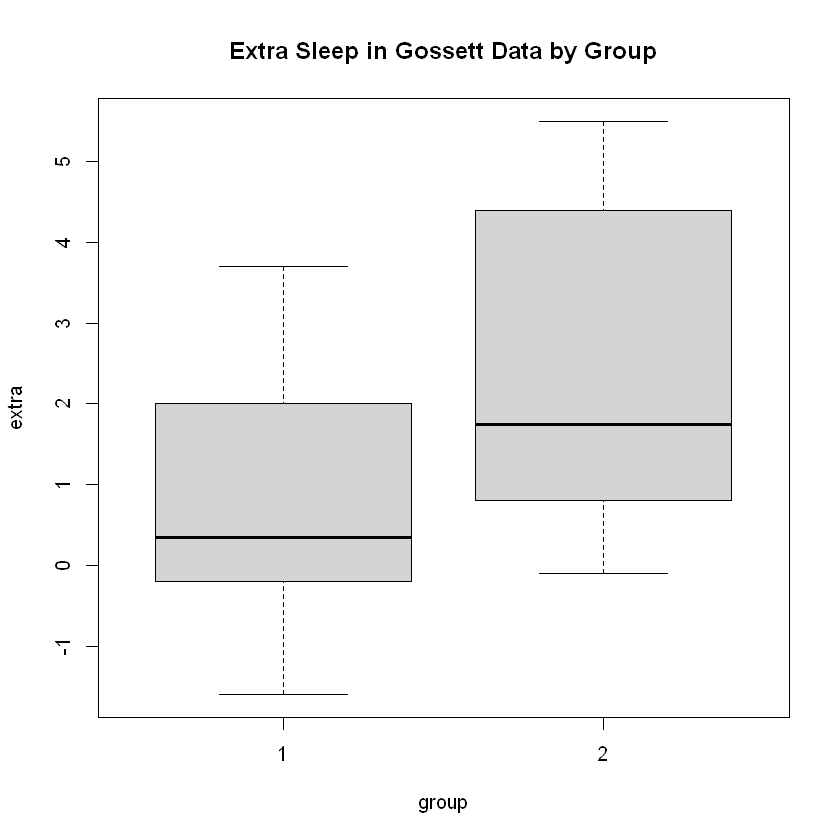

In [5]:
data(sleep)
plot(extra~group, data=sleep, main='Extra Sleep in Gossett Data by Group')

In [6]:
attach(sleep)

In [9]:
# Is there a difference in the average response to each of the two drugs?
extra.1 = extra[group==1]
extra.2 = extra[group==2]
t.test(extra.1, extra.2, paired=TRUE, alternative='two.sided')


	Paired t-test

data:  extra.1 and extra.2
t = -4.0621, df = 9, p-value = 0.002833
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.4598858 -0.7001142
sample estimates:
mean of the differences 
                  -1.58 


##### The Student-t statistic is used for the paired differences. With alpha=0.01, p-value is maller than alpha which shows that the difference between the mean values of the two groups is significant.

#### The 95% CI of the differences is [-2.4599, -0.7001]

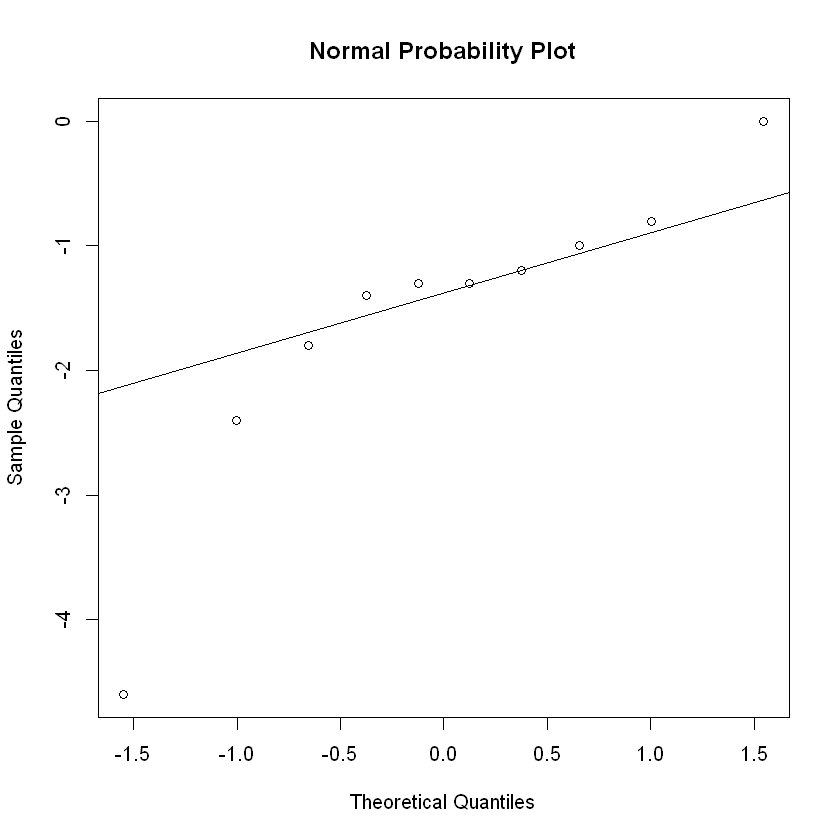

In [10]:
diffs = extra.1-extra.2
qqnorm(diffs, main='Normal Probability Plot')
qqline(diffs)

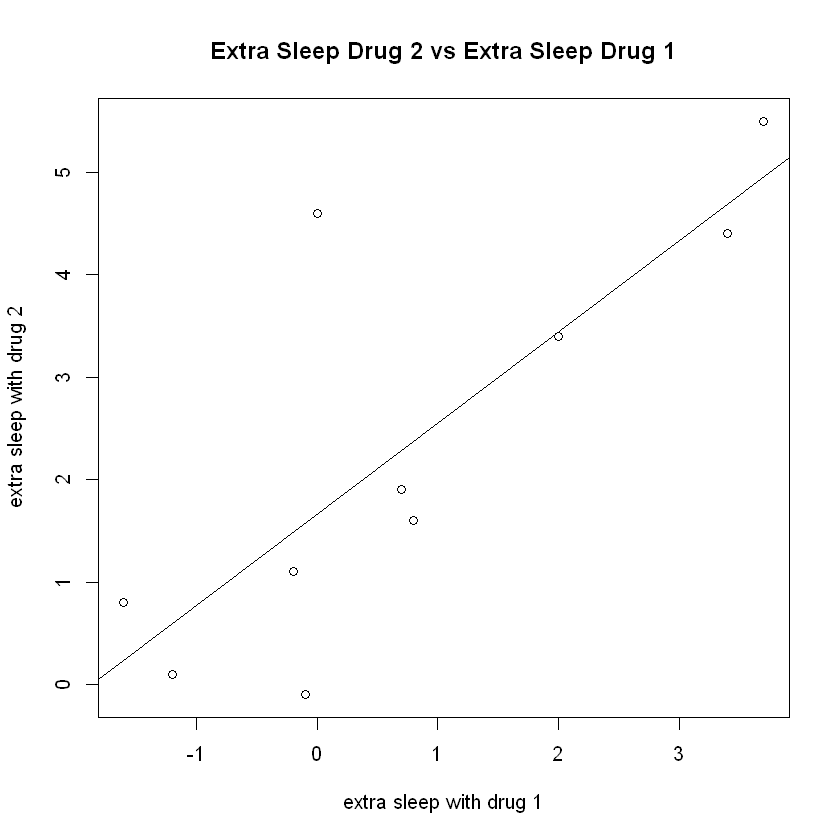

In [14]:
plot(extra.2~extra.1, xlab='extra sleep with drug 1', ylab='extra sleep with drug 2',
    main='Extra Sleep Drug 2 vs Extra Sleep Drug 1')
sleep.linear.model = lm(extra.2 ~ extra.1)
abline(sleep.linear.model)

In [17]:
summary(sleep.linear.model)


Call:
lm(formula = extra.2 ~ extra.1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6735 -0.4673 -0.3365  0.3979  2.9375 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   1.6625     0.4452   3.734  0.00575 **
extra.1       0.8899     0.2399   3.709  0.00596 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.288 on 8 degrees of freedom
Multiple R-squared:  0.6323,	Adjusted R-squared:  0.5863 
F-statistic: 13.76 on 1 and 8 DF,  p-value: 0.005965


##### With a conventional alph=0.01, both coefficients of the linear model are significantly non-zero since the p-values are smaller than alpha.